In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import pandas_profiling
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter
import re

import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
sns.set(style="whitegrid")

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# Загрузим файл содержащий сведения о ресторанах Европы.
main_task = pd.read_csv('main_task.csv')

In [3]:
# Посмотрим названия колонок и при необходимости переименуем их для удобства в работе
main_task.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [4]:
main_task.columns = ['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
                     'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA']

In [5]:
# Посмотрим какие признаки содержат пропуски в данных
main_task.isnull().sum()

Restaurant_id            0
City                     0
Cuisine_Style         9283
Ranking                  0
Rating                   0
Price_Range          13886
Number_of_Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

<AxesSubplot:>

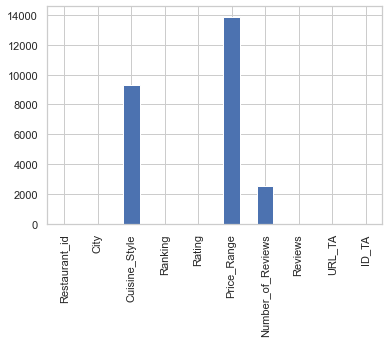

In [6]:
main_task.isnull().sum().plot.bar()

Рассмотрим данные подробно:

In [7]:
main_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine_Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price_Range        26114 non-null  object 
 6   Number_of_Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [8]:
main_task.head()

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [9]:
# Посмотрим тип данных в яцейках
for i in main_task:
    print(i, type(main_task[i][0]))

Restaurant_id <class 'str'>
City <class 'str'>
Cuisine_Style <class 'str'>
Ranking <class 'numpy.float64'>
Rating <class 'numpy.float64'>
Price_Range <class 'str'>
Number_of_Reviews <class 'numpy.float64'>
Reviews <class 'str'>
URL_TA <class 'str'>
ID_TA <class 'str'>


In [10]:
# А можно проверить все ячейки?
for i in main_task.columns:
    main_type = main_task[i].apply(type)
    print(i, main_type.value_counts())

Restaurant_id <class 'str'>    40000
Name: Restaurant_id, dtype: int64
City <class 'str'>    40000
Name: City, dtype: int64
Cuisine_Style <class 'str'>      30717
<class 'float'>     9283
Name: Cuisine_Style, dtype: int64
Ranking <class 'float'>    40000
Name: Ranking, dtype: int64
Rating <class 'float'>    40000
Name: Rating, dtype: int64
Price_Range <class 'str'>      26114
<class 'float'>    13886
Name: Price_Range, dtype: int64
Number_of_Reviews <class 'float'>    40000
Name: Number_of_Reviews, dtype: int64
Reviews <class 'str'>    40000
Name: Reviews, dtype: int64
URL_TA <class 'str'>    40000
Name: URL_TA, dtype: int64
ID_TA <class 'str'>    40000
Name: ID_TA, dtype: int64


Не знаю насколько правильно это получилось? Пропуски определил как тип 'float', почему? Возможно есть метод и лучше, но пока оставлю так, т.к. можно увидеть, что тип данных в одной колонке одинаков, за исключением колонок с пропусками.

# Посмотрим каккие значения в колонках
В колонке "Restaurant_id" указаны id ресторанов, мы знаем, что там нет пропусков и данные одного типа, и это не очень важная для нас информация этот столбец можно сразу удалить. То же с 'ID_TA', который содержит информацию о id-номерах ресторанов только в базе TripAdvisor.

In [11]:
main_task = main_task.drop(['Restaurant_id', 'ID_TA'], axis=1)

А информация о городе, в котором находится ресторан очень важна. Мы знаем, что там нет пропусков и данные одного типа

In [12]:
# Посмотрим какую информацию содержит этот признак
main_task.City.value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [13]:
pd.unique(main_task.City)

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [14]:
len(pd.unique(main_task.City))

31

Данные без пропусков, без лишних символов. Значения можно перевести в цифровой формат, где определенному городу будет соответствовать определенное число.

In [15]:
# создадим Dummy-переменные

In [16]:
main_task = pd.concat([main_task, pd.get_dummies(main_task['City'])], axis=1)

In [17]:
main_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               40000 non-null  object 
 1   Cuisine_Style      30717 non-null  object 
 2   Ranking            40000 non-null  float64
 3   Rating             40000 non-null  float64
 4   Price_Range        26114 non-null  object 
 5   Number_of_Reviews  37457 non-null  float64
 6   Reviews            40000 non-null  object 
 7   URL_TA             40000 non-null  object 
 8   Amsterdam          40000 non-null  uint8  
 9   Athens             40000 non-null  uint8  
 10  Barcelona          40000 non-null  uint8  
 11  Berlin             40000 non-null  uint8  
 12  Bratislava         40000 non-null  uint8  
 13  Brussels           40000 non-null  uint8  
 14  Budapest           40000 non-null  uint8  
 15  Copenhagen         40000 non-null  uint8  
 16  Dublin             400

Price_Range - ценовая категория, важный показатель.

In [18]:
main_task.Price_Range.value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price_Range, dtype: int64

Мы видим, что данные отображены символами - с ними не удобно работать. Заменим их на более привычные low (низкий), middle (средний) и high (высокий) уровень цен.

In [19]:
price_level = {'$': 'low', '$$ - $$$': 'middle', '$$$$': 'high'}

In [20]:
main_task.Price_Range = main_task.Price_Range.replace(to_replace=price_level)

In [21]:
# создадим Dummy-переменные
main_task = pd.concat(
    [main_task, pd.get_dummies(main_task['Price_Range'])], axis=1)

In [22]:
main_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               40000 non-null  object 
 1   Cuisine_Style      30717 non-null  object 
 2   Ranking            40000 non-null  float64
 3   Rating             40000 non-null  float64
 4   Price_Range        26114 non-null  object 
 5   Number_of_Reviews  37457 non-null  float64
 6   Reviews            40000 non-null  object 
 7   URL_TA             40000 non-null  object 
 8   Amsterdam          40000 non-null  uint8  
 9   Athens             40000 non-null  uint8  
 10  Barcelona          40000 non-null  uint8  
 11  Berlin             40000 non-null  uint8  
 12  Bratislava         40000 non-null  uint8  
 13  Brussels           40000 non-null  uint8  
 14  Budapest           40000 non-null  uint8  
 15  Copenhagen         40000 non-null  uint8  
 16  Dublin             400

# Кухни - Cuisine_Style

In [23]:
# Посмотрим какую информацию содержит этот признак
main_task.Cuisine_Style[0]

"['European', 'French', 'International']"

In [24]:
main_task.Cuisine_Style[0].strip("'[]")

"European', 'French', 'International"

In [25]:
for i in main_task.Cuisine_Style.index:
    main_task.Cuisine_Style[i] = [element.strip(
        "'[]") for element in str(main_task.Cuisine_Style[i]).split(", ")]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
main_task.Cuisine_Style

0                        [European, French, International]
1                                                    [nan]
2        [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
3                                                    [nan]
4          [German, Central European, Vegetarian Friendly]
                               ...                        
39995    [Italian, Vegetarian Friendly, Vegan Options, ...
39996    [French, American, Bar, European, Vegetarian F...
39997                                    [Japanese, Sushi]
39998    [Polish, European, Eastern European, Central E...
39999                                            [Spanish]
Name: Cuisine_Style, Length: 40000, dtype: object

In [27]:
Counter(main_task.Cuisine_Style.sum()).most_common(5)

[('Vegetarian Friendly', 11189),
 ('European', 10060),
 ('nan', 9283),
 ('Mediterranean', 6277),
 ('Italian', 5964)]

dummy-переменную мы сдесь не создадим, т.к. информация о стилях кухни хранится в списке, пропробуем иначе создать признаки, основанные на информации о стилях кухни

In [28]:
Cuisine = set()  # создаём пустое множество для хранения уникальных значений стилей кухонь
for c in main_task.Cuisine_Style:  # начинаем перебор всех стилей кухонь
    for i in c:  # начинаем перебор всех стилей кухонь
        # добавляем название стиля кухни к множеству
        Cuisine.add(i)
len(Cuisine)

126

In [29]:
main_task.Cuisine_Style.apply(lambda s: len(s)).mean()

2.6224

In [30]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

In [31]:
for item in Cuisine:
    main_task[item] = main_task['Cuisine_Style'].apply(find_item)

In [32]:
# А сам признак Cuisine_Style заменим количеством типов кухонь, представленных в ресторане
main_task['Cuisine_Style'] = main_task['Cuisine_Style'].apply(lambda x: len(x))

Двнные об отзывах

In [33]:
# Пока заполним пропуски нулями, затем заполним по количеству отзывов в столбце Reviews
main_task['Number_of_Reviews'] = main_task['Number_of_Reviews'].fillna(0)

In [34]:
# Приведем столбец Number_of_Reviews к типу данных int
main_task.Number_of_Reviews = main_task.Number_of_Reviews.astype('int')

In [35]:
main_task.Ranking = main_task.Ranking.astype('int')

In [36]:
main_task['Number_of_Reviews']

0        194
1         10
2        688
3          3
4         84
        ... 
39995     79
39996    542
39997      4
39998     70
39999    260
Name: Number_of_Reviews, Length: 40000, dtype: int64

In [37]:
main_task.Reviews[0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [38]:
 main_task['data_reviews'] =  main_task['Reviews']

In [39]:
pattern_date = re.compile('\d{2}/\d{2}/\d{4}')
for i in main_task.data_reviews.index:
    main_task['data_reviews'][i] = pattern_date.findall(main_task.data_reviews[i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
 main_task['data_reviews'][0]

['12/31/2017', '11/20/2017']

In [41]:
new_rew = main_task['data_reviews'].apply(pd.Series)

In [42]:
new_rew.columns = ['data_reviews_1', 'data_reviews_2']

In [43]:
new_rew = new_rew.fillna(0)

In [44]:
main_task = pd.concat([main_task, new_rew], axis=1).drop('data_reviews', axis=1)

In [45]:
main_task.head()

,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,...,Latvian,Japanese,Croatian,Steakhouse,Hawaiian,Welsh,Jamaican,Asian,Gluten Free Options,Peruvian,Delicatessen,Chilean,Pizza,Australian,Vietnamese,European,Brew Pub,Balti,Hungarian,Colombian,Danish,Halal,Argentinean,data_reviews_1,data_reviews_2
0,Paris,3,5570,3.5,middle,194,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12/31/2017,11/20/2017
1,Stockholm,1,1537,4.0,NaN,10,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,07/06/2017,06/19/2016
2,London,7,353,4.5,high,688,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,01/08/2018,01/06/2018
3,Berlin,1,3458,5.0,NaN,3,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Munich,3,621,4.0,middle,84,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11/18/2017,02/19/2017


In [46]:
main_task['data_reviews_1'] = pd.to_datetime(main_task['data_reviews_1'])

In [47]:
main_task['data_reviews_1'].value_counts()

1970-01-01    6471
2018-01-07     486
2018-01-03     433
2018-01-06     396
2018-01-08     377
              ... 
2013-08-07       1
2013-07-27       1
2014-03-05       1
2012-08-13       1
2012-09-27       1
Name: data_reviews_1, Length: 1881, dtype: int64

In [48]:
main_task['data_reviews_2'] = pd.to_datetime(main_task['data_reviews_2'])

In [49]:
main_task['data_reviews_2'].value_counts()

1970-01-01    11027
2018-01-03      194
2017-12-30      174
2018-01-04      167
2018-01-01      166
              ...  
2015-01-02        1
2013-09-01        1
2013-08-09        1
2009-01-14        1
2013-01-26        1
Name: data_reviews_2, Length: 1952, dtype: int64

Много ячеек с датой 1970-01-01 скорее всего это ошибочная информация

In [50]:
((main_task['data_reviews_2'][(main_task['data_reviews_2'] > '1970-01-01')]) -
 (main_task['data_reviews_1'][(main_task['data_reviews_1'] > '1970-01-01')])).sort_values()

7990    -3207 days
10997   -3137 days
39997   -3127 days
8356    -3096 days
19438   -3094 days
           ...    
39972          NaT
39974          NaT
39983          NaT
39984          NaT
39989          NaT
Length: 33529, dtype: timedelta64[ns]

Хотя честно, даты отзывов не влияют на рейтинг, да и не принимаются моделью.

Гораздо интереснее выделить положительно окрашенные слова (good, fine, great, fantastic) или негативно окрашенные (bad) и создать на их основании признаки. Или например по словам типа cheap или expensive заполнить пропуски в столбце Price_Range. Но моих навыков на данном этапе обучения не хватило для этого. Надеюсь научится)) Придется удалить эти признаки.

# Проведем корреляционный анализ

<AxesSubplot:>

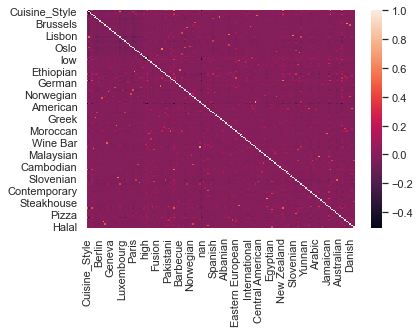

In [51]:
plt.figure()
sns.heatmap(main_task.corr())

In [52]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
# Что бы модель сработала оставим в переменной X только столбцы в формате float
X = main_task.drop(['Rating', 'Reviews', 'URL_TA', 'City', 'Price_Range', 'data_reviews_1', 'data_reviews_2'], axis=1)
y = main_task['Rating']

In [53]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [54]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [55]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [56]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [57]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.212245


ссылка на Kaggle

https://www.kaggle.com/alexandrasokolova/baseline-sf-tripadvisor-rating-v2-7